In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

/home/iron/Install/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image, y_train_lable), (x_test_image, y_test_lable) = mnist.load_data()

In [3]:
x_test_image.shape

(10000, 28, 28)

In [4]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [5]:
x_Train_normal = x_Train/255
x_Test_normal = x_Test/255

In [6]:
y_Train_OneHot = np_utils.to_categorical(y_train_lable)
y_Test_OneHot = np_utils.to_categorical(y_test_lable)

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [60]:
model = Sequential()

In [61]:
model.add(Dense(units=1000,input_dim=784, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))

In [62]:
model.add(Dense(units=10, kernel_initializer='normal',activation='softmax'))

In [63]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [64]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
train_history = model.fit(x=x_Train_normal, y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 21s - loss: 0.3741 - acc: 0.8851 - val_loss: 0.1324 - val_acc: 0.9599
Epoch 2/10
 - 22s - loss: 0.1607 - acc: 0.9512 - val_loss: 0.1011 - val_acc: 0.9688
Epoch 3/10
 - 21s - loss: 0.1204 - acc: 0.9629 - val_loss: 0.0912 - val_acc: 0.9738
Epoch 4/10
 - 23s - loss: 0.0988 - acc: 0.9695 - val_loss: 0.0841 - val_acc: 0.9743
Epoch 5/10
 - 21s - loss: 0.0848 - acc: 0.9738 - val_loss: 0.0826 - val_acc: 0.9763
Epoch 6/10
 - 20s - loss: 0.0765 - acc: 0.9759 - val_loss: 0.0750 - val_acc: 0.9768
Epoch 7/10
 - 19s - loss: 0.0669 - acc: 0.9790 - val_loss: 0.0811 - val_acc: 0.9773
Epoch 8/10
 - 19s - loss: 0.0608 - acc: 0.9801 - val_loss: 0.0769 - val_acc: 0.9783
Epoch 9/10
 - 19s - loss: 0.0548 - acc: 0.9820 - val_loss: 0.0742 - val_acc: 0.9788
Epoch 10/10
 - 20s - loss: 0.0507 - acc: 0.9835 - val_loss: 0.0740 - val_acc: 0.9793


In [66]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

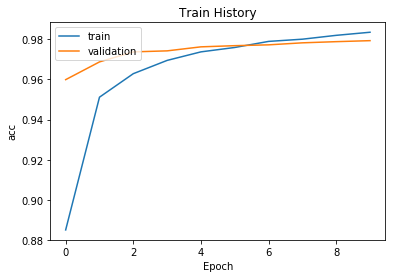

In [67]:
show_train_history(train_history,'acc','val_acc')

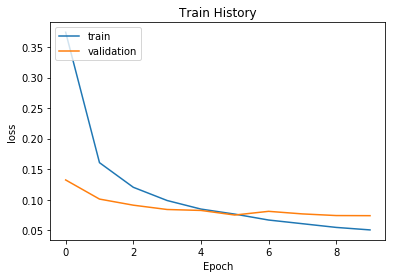

In [68]:
show_train_history(train_history, 'loss', 'val_loss')

In [69]:
scores = model.evaluate(x_Test_normal, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 2s 211us/step

accuracy= 0.9815


In [18]:
prediction = model.predict_classes(x_Test)

In [19]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ", predict=" + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx += 1
    plt.show()

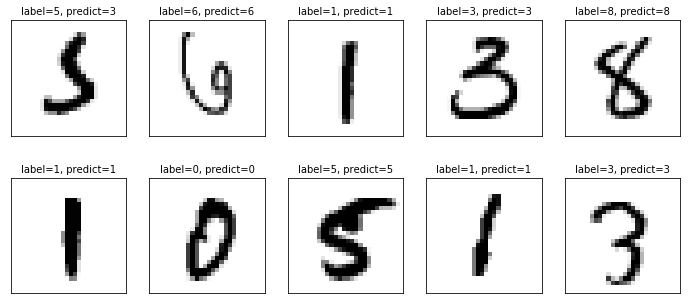

In [21]:
plot_images_labels_prediction(x_test_image, y_test_lable, prediction, idx=340)

In [22]:
import pandas as pd
pd.crosstab(y_test_lable, prediction, colnames=['predict'], rownames=['label'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,0,1,0,2,4,9,1
3,0,0,3,995,0,0,0,3,5,4
4,1,0,5,1,961,0,3,0,3,8
5,2,0,0,16,1,854,7,1,8,3
6,5,3,3,1,4,3,937,0,2,0
7,0,5,12,6,1,0,0,990,6,8
8,5,0,3,5,0,1,1,2,956,1


In [24]:
df = pd.DataFrame({'label':y_test_lable, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [25]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


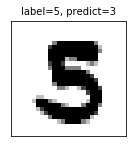

In [28]:
plot_images_labels_prediction(x_test_image, y_test_lable, prediction, idx=1003, num=1)